# Import necessary dependencies and settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100


# Raw Measures

## Values

In [2]:
# Lee Pokemon.csv en un DataFrame
poke_df = pd.read_csv("Pokemon.csv", encoding='latin_1', index_col='#')
poke_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [3]:
# Muestra las columnas HP, Attack y Defense
poke_df[['HP','Attack','Defense']].tail()

,HP,Attack,Defense
#,,,
147,41,64,45
148,61,84,65
149,91,134,95
150,106,110,90
151,100,100,100


In [4]:
# Muestra una descripción de esas columnas
poke_df[['HP','Attack','Defense']].describe()

,HP,Attack,Defense
count,151.000000,151.000000,151.000000
mean,64.211921,72.549669,68.225166
std,28.590117,26.596162,26.916704
min,10.000000,5.000000,5.000000
25%,45.000000,51.000000,50.000000
50%,60.000000,70.000000,65.000000
75%,80.000000,90.000000,84.000000
max,250.000000,134.000000,180.000000


## Counts

Load the song_views.csv dataset and understand the features.

In [5]:
# Lee song_views.csv y visualízalo en un DataFrame
song_df = pd.read_csv('song_views.csv')
song_df.head()

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0


In [6]:
song_df.columns

Index(['user_id', 'song_id', 'title', 'listen_count'], dtype='object')

# Binarization

Often raw frequencies or counts may not be relevant for building a model based on the problem which is being solved. For instance if I’m building a recommendation system for song recommendations, I would just want to know if a person is interested or has listened to a particular song. This doesn’t require the number of times a song has been listened to since I am more concerned about the various songs he\she has listened to. In this case, a binary feature is preferred as opposed to a count based feature. Add a column that includes this information, with a new column watched, that takes the value 1, when the listen count is >0


In [7]:
# en el DataFrame de canciones, añade una columna que indique con el valor 1 si esa canción se ha escuchado alguna vez

mask = song_df.listen_count > 0
mask.head()
song_df['listening_value'] = mask
song_df['listening_value'].dtype
song_df['listening_value'] = song_df['listening_value'].astype(int)

In [8]:
# Muestra un head para ver tus resultados
song_df['listening_value'].head()

0    1
1    0
2    0
3    0
4    0
Name: listening_value, dtype: int32

In [9]:
song_df.head()

,user_id,song_id,title,listen_count,listening_value
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0


## Binarization with sklearn

Look at the documentation of sklearn preprecessing. Specifically to the Binarizer method. Try to use this method to obtainn a binarization of the song_views dataset.

In [10]:
# Busca documentación sobre el preprocesado de sklearn (en concreto, Binarizer)
from sklearn.preprocessing import Binarizer

print(np.array(song_df['listen_count']).shape)

#Se necesita un numpy array 2D
x = np.array(song_df['listen_count']).reshape(-1,1)

#threshold es la frontera, por defecto '0' pero lo indicamos para practicar
binarizer = Binarizer(threshold= 0, copy=True) 
song_df['listening_value_binarizer'] =binarizer.fit_transform(x)
song_df.head()

(365,)


,user_id,song_id,title,listen_count,listening_value,listening_value_binarizer
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0


In [11]:
song_df.listening_value_binarizer.all() == song_df.listening_value.all()

True

# Rounding

Load the item_popularity.csv dataset and understand the features.

In [12]:
pop_df = pd.read_csv('item_popularity.csv')
pop_df.head()

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101


Include new columns in the dataset showing a popularity scale of 100 and 1000, being those 2 columns integer numbers.

In [13]:
pop_df['pop_100'] = (pop_df['pop_percent']*100).astype(int)

In [14]:
pop_df['pop_1000'] = (pop_df['pop_percent']*1000).astype(int)

In [15]:
pop_df.head()

,item_id,pop_percent,pop_100,pop_1000
0,it_01345,0.98324,98,983
1,it_03431,0.56123,56,561
2,it_04572,0.12098,12,120
3,it_98021,0.35476,35,354
4,it_01298,0.92101,92,921


# Interactions

Load the pokemon dataset. Build a new data set including only 'Attack' and 'Defense'.

In [16]:
poke_A_D = poke_df[['Attack','Defense']].copy()

In [17]:
poke_A_D.head()

,Attack,Defense
#,,
1,49,49
2,62,63
3,82,83
4,52,43
5,64,58


Build a new dataframe using the PolynomialFeatures method in sklearn.preprocesing. Use a degree 2 polynomic function. Try to understand what is happening.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree = 2, interaction_only=True) #Cambiar interaction_only (False/True)

In [20]:
poly.fit(poke_A_D.values)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=True,
                   order='C')

In [21]:
poly_Attack_Defense = poly.transform(poke_A_D.values)

In [22]:
poly.get_feature_names() #Cambiar interaction_only

['1', 'x0', 'x1', 'x0 x1']

In [23]:
print(poly_Attack_Defense.shape)
poly_df = pd.DataFrame(poly_Attack_Defense, columns = poly.get_feature_names()) 
poly_df.head()  #Cambiar interaction_only

(151, 4)


,1,x0,x1,x0 x1
0,1.0,49.0,49.0,2401.0
1,1.0,62.0,63.0,3906.0
2,1.0,82.0,83.0,6806.0
3,1.0,52.0,43.0,2236.0
4,1.0,64.0,58.0,3712.0


In [24]:
poly_df['x0 x1'].argmax()

90

In [25]:
poly_df.iloc[poly_df['x0 x1'].argmax()]

1            1.0
x0          95.0
x1         180.0
x0 x1    17100.0
Name: 90, dtype: float64

In [26]:
poke_df.iloc[poly_df['x0 x1'].argmax()]

Name         Cloyster
Type 1          Water
Type 2            Ice
Total             525
HP                 50
Attack             95
Defense           180
Sp. Atk            85
Sp. Def            45
Speed              70
Stage               2
Legendary       False
Name: 91, dtype: object

In [27]:
# Lo que estamos calculando es el Ataque x Defensa, es decir, una medida de fortaleza del pokemon

# Binning

Import the dataset in fcc_2016_coder_survey_subset.csv

In [28]:
# Nos interesan solo 'ID.x', 'EmploymentField', 'Age', 'Income'

In [23]:
fcc_df = pd.read_csv("../../semana_10/día_3/fcc_2016_coder_survey_subset.csv", sep=',', usecols=['ID.x', 'EmploymentField', 'Age', 'Income'])
fcc_df.head()

,ID.x,Age,EmploymentField,Income
0,cef35615d61b202f1dc794ef2746df14,28.0,office and administrative support,32000.0
1,323e5a113644d18185c743c241407754,22.0,food and beverage,15000.0
2,b29a1027e5cd062e654a63764157461d,19.0,finance,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,26.0,"arts, entertainment, sports, or media",43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,education,6000.0


In [24]:
fcc = fcc_df.copy()

## Fixed-width binning

Create an histogram with the Age of the developers

Text(0, 0.5, 'Frecuency')

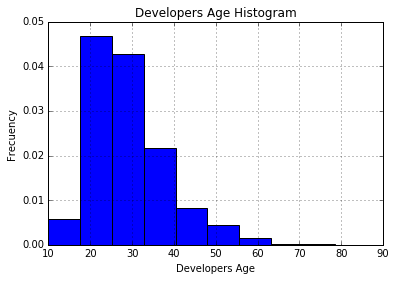

In [28]:
import seaborn as sns
fig, ax = plt.subplots()
fcc_df['Age'].hist(density=True)
ax.set_title("Developers Age Histogram", fontsize= 12)
ax.set_xlabel('Developers Age', fontsize = 10)
ax.set_ylabel('Frecuency', fontsize= 10)

### Developer age distribution

In [5]:
fcc['Age'].median(skipna=True)

27.0

In [6]:
#fcc['Age'] = fcc['Age'].fillna(value= fcc['Age'].median(skipna=True))

In [7]:
print(fcc.size)
print(np.sum(fcc['Age'].isnull()))
print((str((np.sum(fcc['Age'].isnull())/fcc.size )*100)) + "%")

62480
2007
3.2122279129321383%


In [8]:
fcc_df

,ID.x,Age,EmploymentField,Income
0,cef35615d61b202f1dc794ef2746df14,28.0,office and administrative support,32000.0
1,323e5a113644d18185c743c241407754,22.0,food and beverage,15000.0
2,b29a1027e5cd062e654a63764157461d,19.0,finance,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,26.0,"arts, entertainment, sports, or media",43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,education,6000.0
...,...,...,...,...
15615,734bc2496485b7857ade38d4490cd1ec,39.0,software development and IT,10000.0
15616,8d838e8e4604e995d83c95ab764fe78c,27.0,software development and IT,10000.0
15617,5b1323796ca6ab9a58936ff772dbb988,37.0,NaN,48000.0
15618,afe9f743395dedb14b09fe3e1c4db2a6,26.0,education,10000.0


In [9]:
fcc = fcc.dropna(subset=['Age'])
fcc.isnull().any()

ID.x               False
Age                False
EmploymentField     True
Income              True
dtype: bool

Text(0.5, 1.0, 'Developers Age')

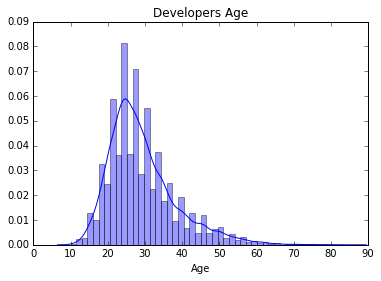

In [10]:
sns.distplot(fcc['Age'])
plt.title("Developers Age", fontsize= 12)

Text(0, 0.5, 'Density Estimation')

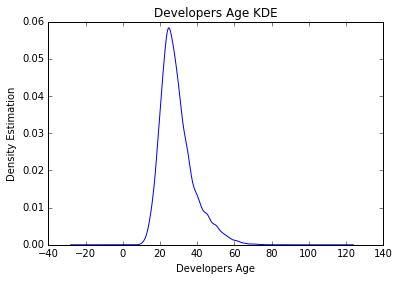

In [32]:
#Sin utilizar seaborn, sns
import seaborn as sns
fig, ax = plt.subplots()
#Kernel Density Estimation
fcc_df['Age'] .plot.kde()
ax.set_title("Developers Age KDE", fontsize= 12)
ax.set_xlabel('Developers Age', fontsize = 10)
ax.set_ylabel('Density Estimation', fontsize= 10)

### Binning based on rounding

Create a new column in the dataframe, that indicates the following bins: 

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

In [11]:
fcc_df['Age_bin_round'] = np.floor((fcc_df['Age'].values/10.))
fcc_df.head()

,ID.x,Age,EmploymentField,Income,Age_bin_round
0,cef35615d61b202f1dc794ef2746df14,28.0,office and administrative support,32000.0,2.0
1,323e5a113644d18185c743c241407754,22.0,food and beverage,15000.0,2.0
2,b29a1027e5cd062e654a63764157461d,19.0,finance,48000.0,1.0
3,04a11e4bcb573a1261eb0d9948d32637,26.0,"arts, entertainment, sports, or media",43000.0,2.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,education,6000.0,2.0


### Binning based on custom ranges

Create two new columns in the dataframe. The first one should include the custom age range. The second one should include the bin_label. You should use the cut() function.

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [12]:
bin_range = [0, 15, 30, 45, 60, 75, 100]
bin_name = [ 1,2,3,4,5,6]

fcc_df['Age_bin_range'] = pd.cut(fcc_df['Age'].values, bins = bin_range)

fcc_df['Age_bin_name'] = pd.cut(fcc_df['Age'].values, bins= bin_range, labels=bin_name)

fcc_df.tail()

,ID.x,Age,EmploymentField,Income,Age_bin_round,Age_bin_range,Age_bin_name
15615,734bc2496485b7857ade38d4490cd1ec,39.0,software development and IT,10000.0,3.0,"(30, 45]",3
15616,8d838e8e4604e995d83c95ab764fe78c,27.0,software development and IT,10000.0,2.0,"(15, 30]",2
15617,5b1323796ca6ab9a58936ff772dbb988,37.0,NaN,48000.0,3.0,"(30, 45]",3
15618,afe9f743395dedb14b09fe3e1c4db2a6,26.0,education,10000.0,2.0,"(15, 30]",2
15619,bcfd613973e7746c38f49cd8dfd9ec6c,22.0,"arts, entertainment, sports, or media",18000.0,2.0,"(15, 30]",2


## Quantile based binning

Now we will work with the salaries of the dataset

### Plot an histogram with the developers income, with 30 bins.

Text(0, 0.5, 'Frecuency')

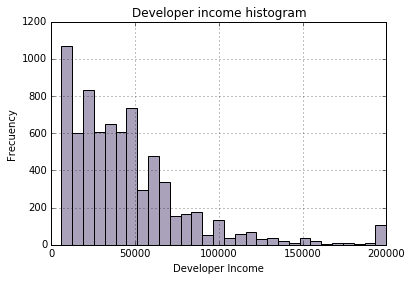

In [13]:
fig, ax = plt.subplots()
fcc_df['Income'].hist(bins=30, color = '#AAA2BB')
ax.set_title('Developer income histogram', fontsize= 12)
ax.set_xlabel('Developer Income')
ax.set_ylabel('Frecuency')

### Calculate the [0, .25, .5, .75, 1.] qunatiles, and plot them as lines in the histogram

In [14]:
quantil_list = [0,.25,.5,.75,1]
quantiles = fcc_df['Income'].quantile(quantil_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frecuency')

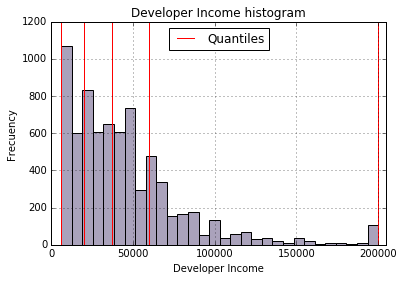

In [15]:
fig, ax = plt.subplots()
fcc_df['Income'].hist(bins=30, color = '#AAA2BB')
ax.set_title('Developer Income histogram', fontsize= 12)
for quantile in quantiles:
    qtl = plt.axvline(quantile,color='r')
ax.set_xlim(0,205000)
ax.legend([qtl],['Quantiles'], loc = 'top_center')
ax.set_xlabel('Developer Income')

ax.set_ylabel('Frecuency')

### In the original dataframe create 2 columns. One that indicates the income range values, and a second one with the following labels: ['0-25Q', '25-50Q', '50-75Q', '75-100Q']

In [16]:
quantil_labels = ['0-25Q','25-50Q','50-75Q','75-100Q']

fcc_df['Income_range_values'] = pd.qcut(fcc_df['Income'].values, q=quantil_list )

fcc_df['Income_range_labels'] = pd.qcut(fcc_df['Income'].values, q= quantil_list, labels=quantil_labels )

fcc_df.head()

,ID.x,Age,EmploymentField,Income,Age_bin_round,Age_bin_range,Age_bin_name,Income_range_values,Income_range_labels
0,cef35615d61b202f1dc794ef2746df14,28.0,office and administrative support,32000.0,2.0,"(15, 30]",2,"(20000.0, 37000.0]",25-50Q
1,323e5a113644d18185c743c241407754,22.0,food and beverage,15000.0,2.0,"(15, 30]",2,"(5999.999, 20000.0]",0-25Q
2,b29a1027e5cd062e654a63764157461d,19.0,finance,48000.0,1.0,"(15, 30]",2,"(37000.0, 60000.0]",50-75Q
3,04a11e4bcb573a1261eb0d9948d32637,26.0,"arts, entertainment, sports, or media",43000.0,2.0,"(15, 30]",2,"(37000.0, 60000.0]",50-75Q
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,education,6000.0,2.0,"(15, 30]",2,"(5999.999, 20000.0]",0-25Q


# Mathematical Transformations

## Log transform

In the salaries survey dataset include a new column with the log transformation of the income called 'Income_log'.


In [17]:
fcc_df['Income_log'] = np.log(1 +fcc_df['Income'])
fcc_df[['ID.x', 'Age', 'Income', 'Income_log']].head()

,ID.x,Age,Income,Income_log
0,cef35615d61b202f1dc794ef2746df14,28.0,32000.0,10.373522
1,323e5a113644d18185c743c241407754,22.0,15000.0,9.615872
2,b29a1027e5cd062e654a63764157461d,19.0,48000.0,10.778977
3,04a11e4bcb573a1261eb0d9948d32637,26.0,43000.0,10.668979
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681


Plot the hinstogram of the 'Income_log' column, with 30 bins. Include a line showing the mean of the new colunm in the histogram plot.

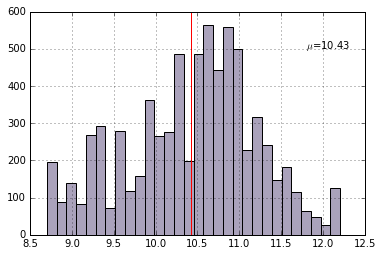

In [18]:
fig, ax = plt.subplots()
fcc_df['Income_log'].hist(bins = 30,  color = '#AAA2BB')
plt.axvline(x=fcc_df['Income_log'].mean(), color='r')
ax.text(11.8, 500, r'$\mu$='+str(np.round(fcc_df['Income_log'].mean(),2)), fontsize=10);

## Box–Cox transform

Build 2 new columns with the 'boxcox' method.

In the first place you have to remove the NaN in in come and calculate the optimal lambda with boxcox.

Then build the dataframe using lmbda=0 and the optimal value including the columns 'Income_boxcox_lambda_0' and 'Income_boxcox_lambda_opt'. 

Visualize the results. As you can see the lmbda=0 creates a log transformation. 


In [19]:
from scipy import stats
income = fcc_df['Income'].values
income_clean = income[~np.isnan(income)]

l, opt_lambda = stats.boxcox(income_clean)
"The optimal_value_lambda is "+ str(opt_lambda)


'The optimal_value_lambda is 0.11799122497648248'

In [20]:
fcc_df['Income_boxcox_lambda_0'] = stats.boxcox(1 + fcc_df['Income'], lmbda=0)
fcc_df['Income_boxcox_opt_lambda'] = stats.boxcox(fcc_df['Income'], lmbda = opt_lambda)
fcc_df[['ID.x', 'Age', 'Income', 'Income_log','Income_boxcox_lambda_0','Income_boxcox_opt_lambda']].head()

,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_opt_lambda
0,cef35615d61b202f1dc794ef2746df14,28.0,32000.0,10.373522,10.373522,20.346418
1,323e5a113644d18185c743c241407754,22.0,15000.0,9.615872,9.615872,17.881577
2,b29a1027e5cd062e654a63764157461d,19.0,48000.0,10.778977,10.778977,21.758798
3,04a11e4bcb573a1261eb0d9948d32637,26.0,43000.0,10.668979,10.668979,21.368923
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180667


### Plot the histogram of the 'Income_boxcox_lambda_opt' column, with 30 bins. Include a line showing the mean of the new colunm in the histogram plot. Plot a line with the value of the mean of the new column.

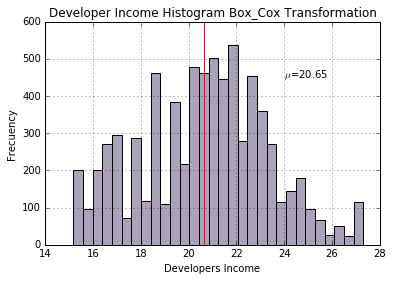

In [21]:
income_boxcox_mean = np.round(np.mean(fcc_df['Income_boxcox_opt_lambda']), 2)

fig , ax = plt.subplots()
fcc_df['Income_boxcox_opt_lambda'].hist(bins=30, color = '#AAA2BB')
plt.axvline(income_boxcox_mean, color= 'r')
ax.set_title('Developer Income Histogram Box_Cox Transformation', fontsize=12)
ax.set_xlabel('Developers Income',fontsize=10)
ax.set_ylabel('Frecuency', fontsize=10);

ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10);